# Logistic Growth

 $$\frac{dN(t)}{dt}=rN(t)\left(1-\frac{N(t)}{K}\right)$$

## Numerical Solution

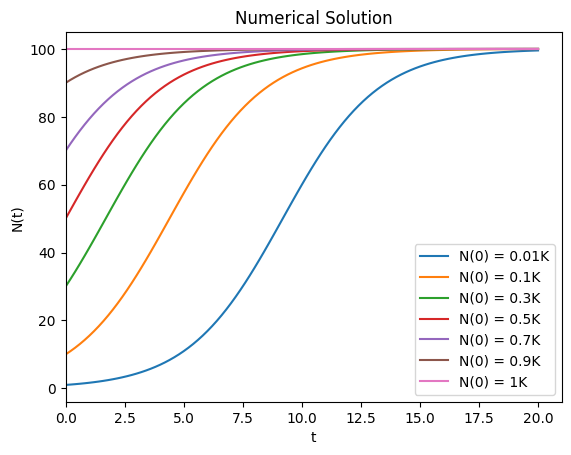

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def N(y,t,r,K):
    return r*y - r * y**2/K

#r = b-d
r = 0.5
#K num of individuals
K = 100
t = np.linspace(0,20,101)

for i in [0.01,0.1,0.3,0.5,0.7,0.9,1]:
    N0 = i * K
    sol = odeint(N,N0,t,args=(r,K))
    plt.plot(t,sol, label = f"N(0) = {i}K")
    
plt.title("Numerical Solution")
plt.xlabel("t")
plt.ylabel("N(t)")
plt.xlim(0,21)    
plt.legend()


## Mathematical Solution


$$\begin{split}
\int \frac{dN}{N(1-\frac{N}{K})} &= \int r dt \\
\int \frac{1}{N}dN + \int \frac{1}{K-N}dN &= \int rdt\\
\log N - \log(K-N) &= rt +c \\
\log \frac{N}{K-N} &= rt + c 
\end{split}$$

At $t=0$ $$e^c = \frac{N(0)}{K-N(0)}$$

So the solution is going to be $$N(t) = \frac{Ke^{rt}e^c}{K+e^{rt}e^c} = \frac{KN(0)e^{rt}}{K-N(0) +N(0)e^{rt}}$$

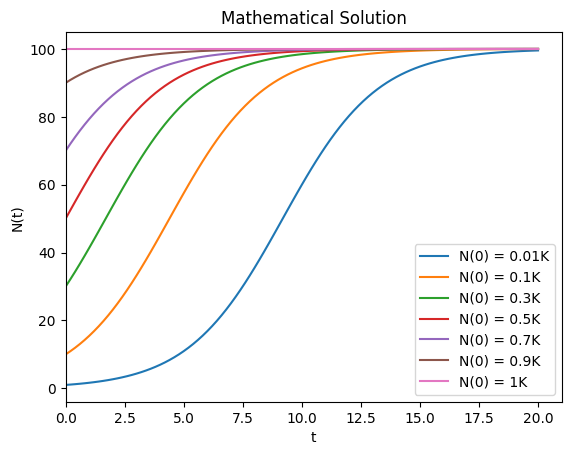

In [15]:
def math_sol(N0,t,r,K):
    return K*N0 * np.exp(r*t) / (K-N0 + N0*np.exp(r*t))

for i in [0.01,0.1,0.3,0.5,0.7,0.9,1]:
    N0 = i * K
    N = [math_sol(N0,dt,r,K) for dt in t]
    plt.plot(t,N, label = f"N(0) = {i}K")

plt.title("Mathematical Solution")
plt.ylabel("N(t)")
plt.xlabel("t")
plt.xlim(0,21)
plt.legend()

## Studying stability and steady states

The differential equation for $dN$ can tell us a lot about the population for example if we plot $dN$ to $N$ it can tell us a lot about how the population rate of change changes

(0.0, 13.125)

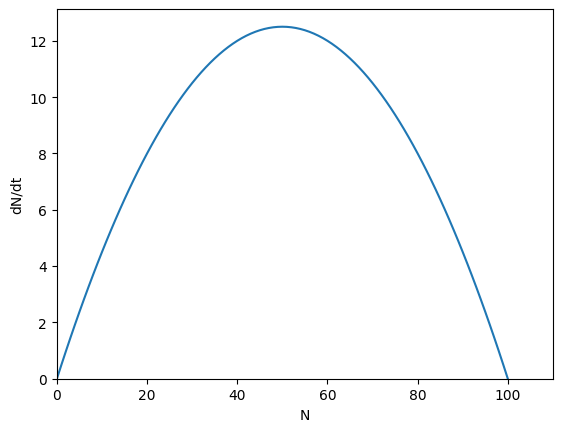

In [19]:
def dN_dt(N,t,r,K):
    return r*N - r * N**2/K


N = np.linspace(0,100,101)

N_prime = [dN_dt(Ni,t,r,K) for Ni in N]

plt.plot(N,N_prime)
plt.xlabel("N")
plt.ylabel("dN/dt")
plt.xlim(0,110)
plt.ylim(0,)

This corresponds to the fast growth at the start and the slow down until we reach a **steady state** i.e. $n$ such that $\frac{dN}{dt} (n) = 0$ this means that if a population starts at this point it will stay there. Note that that from this we can observe that if the second derivative at a point $n$ is positive then $n$ is unstable as if we are at a point $n_1 > n$ we will drift away from the steady state. Similarly if the second derivative is negative then if we are off from the steady state we will go back to it

## Harvesting

A last example will be harvesting where we will introduce a term $-\alpha N$ which will account for e.g. fish caught so  $$\frac{dN(t)}{dt}=rN(t)\left(1-\frac{N(t)}{K}\right) - \alpha N(t)$$

Now we can find the steady state is $\frac{r-\alpha}{r}K$

(0.0, 5.725)

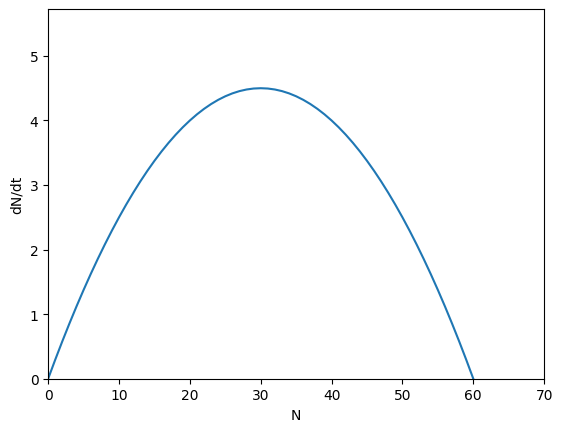

In [22]:
def dN_dt(N,t,a,r,K):
    return r*N - r * N**2/K - a*N


N = np.linspace(0,100,101)
a = 0.2
N_prime = [dN_dt(Ni,t,a,r,K) for Ni in N]

plt.plot(N,N_prime)
plt.xlabel("N")
plt.ylabel("dN/dt")
plt.xlim(0,70)
plt.ylim(0,)